<a href="https://colab.research.google.com/github/20adityasingh/MLPractice4/blob/master/MLPractice4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv('Population_Data.csv')
df.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [57]:
df.isnull().sum()

,0
Region,0
Office Location Id,0
Indians,0
Foreigners,0
Indian_Male,0
Indian_Female,0
Foreigners_Male,0
Foreigners_Female,0
Total Population,0


In [58]:
numeric = ["Indians","Foreigners",
           "Indian_Male","Indian_Female",
           "Foreigners_Female",
           'Foreigners_Male',"Total Population"]

In [59]:
def cleaner(z):
  return z.replace(',','')

In [60]:
for i in numeric:
  df[i] = df[i].apply(cleaner)

In [61]:
for i in numeric:
  df[i] = df[i].astype(int)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     int64 
 3   Foreigners          38 non-null     int64 
 4   Indian_Male         38 non-null     int64 
 5   Indian_Female       38 non-null     int64 
 6   Foreigners_Male     38 non-null     int64 
 7   Foreigners_Female   38 non-null     int64 
 8   Total Population    38 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


In [63]:
df.drop(['Region', 'Office Location Id'], axis=1, inplace=True)

In [64]:
df[['Indian_Male','Indian_Female']].sum().sum() - df['Indians'].sum()

0

In [65]:
df[['Foreigners_Male','Foreigners_Female']].sum().sum() - df['Foreigners'].sum()

-112859

In [66]:
TP = df['Indian_Male'] + df['Indian_Female'] + df['Foreigners_Male'] + df['Foreigners_Female']
diff1 = df['Total Population'] - TP
df['others'] = diff1

TF = df['Foreigners_Male'] + df['Foreigners_Female']
diff2 = df['Foreigners'] - TF
df['Foreigners_Other'] = diff2

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Indians            38 non-null     int64
 1   Foreigners         38 non-null     int64
 2   Indian_Male        38 non-null     int64
 3   Indian_Female      38 non-null     int64
 4   Foreigners_Male    38 non-null     int64
 5   Foreigners_Female  38 non-null     int64
 6   Total Population   38 non-null     int64
 7   others             38 non-null     int64
 8   Foreigners_Other   38 non-null     int64
dtypes: int64(9)
memory usage: 2.8 KB


In [68]:
df.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,others,Foreigners_Other
0,643596,2883782,440445,203151,2763718,72515,3527378,47549,47549
1,319933,1501899,213477,106456,1449303,27671,1821832,24925,24925
2,194379,650744,161803,32576,631660,10652,845123,8432,8432
3,107360,470708,85343,22017,450267,6389,578068,14052,14052
4,55351,329980,31796,23555,325105,3684,385331,1191,1191


<Axes: >

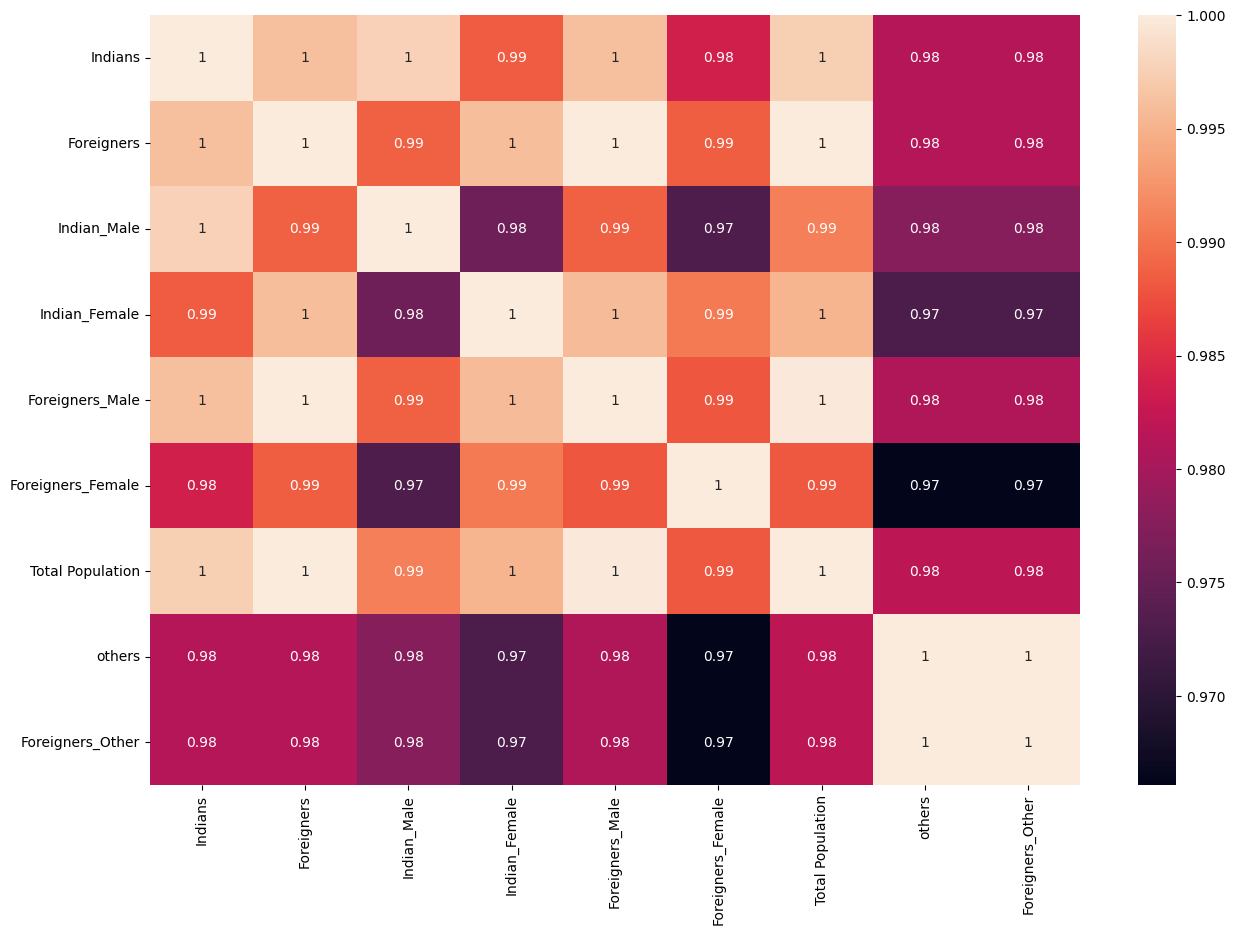

In [69]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True)

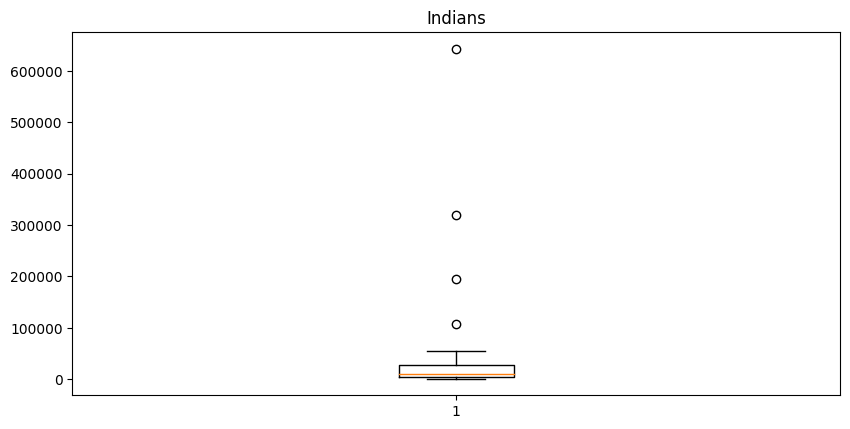

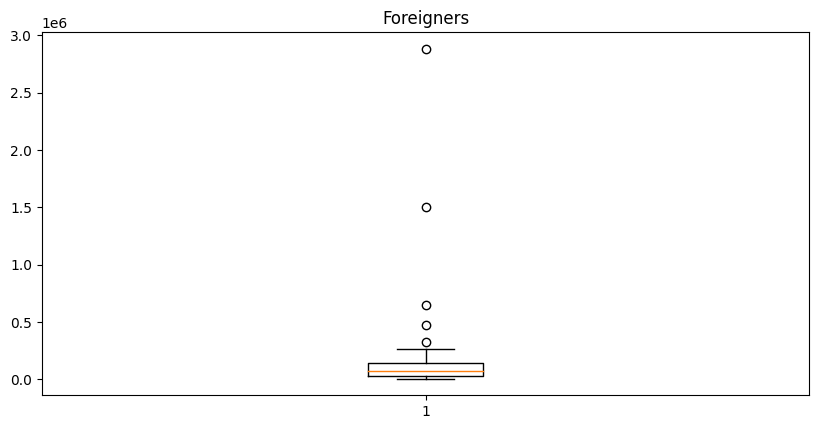

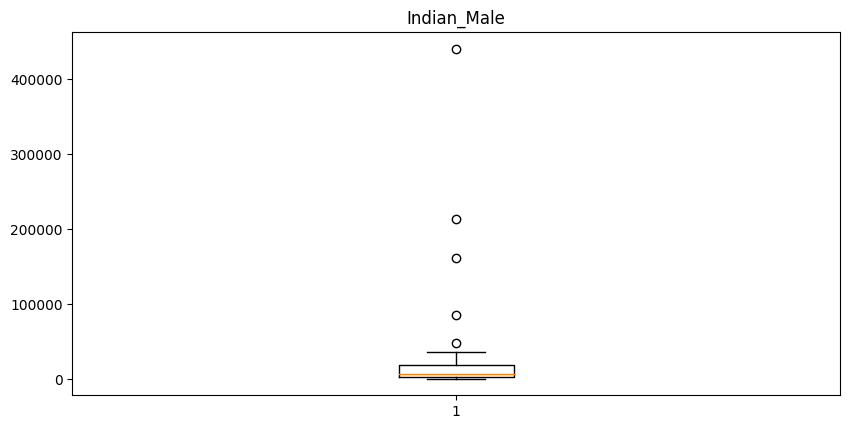

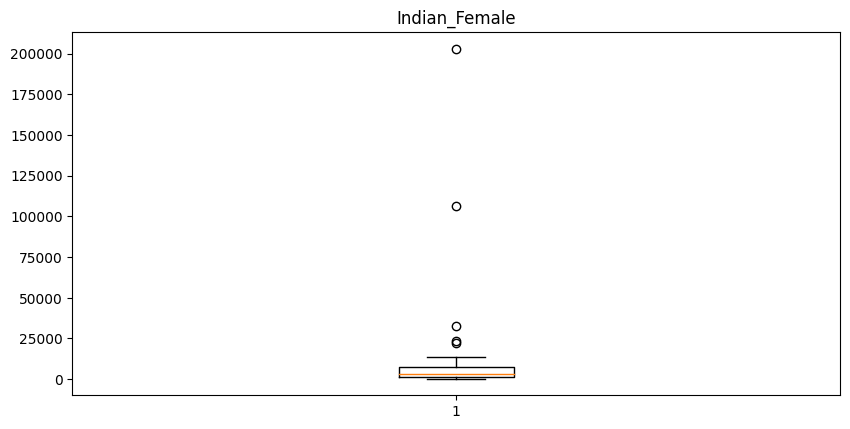

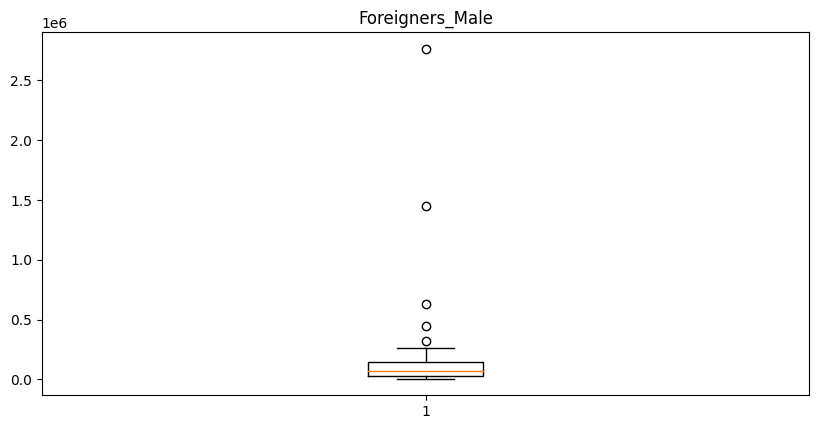

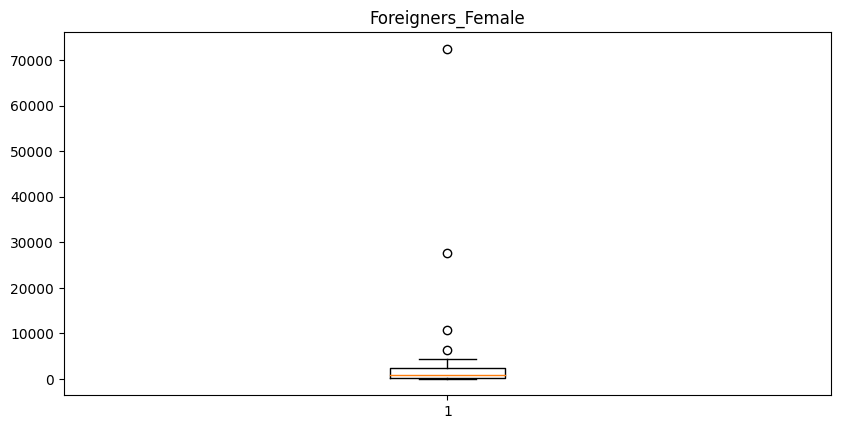

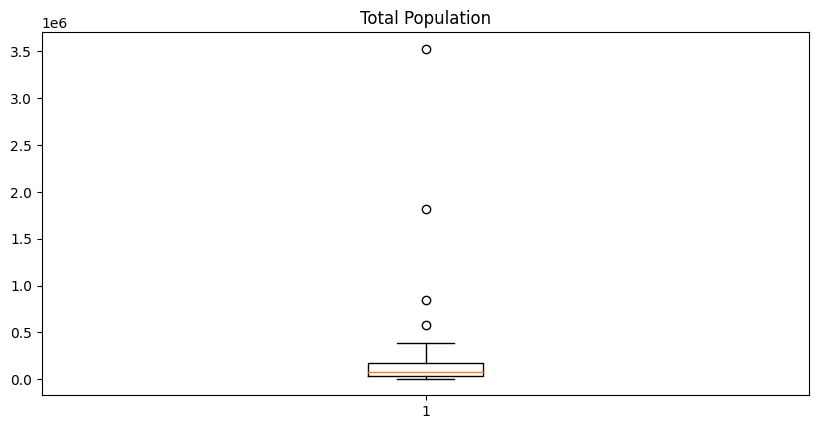

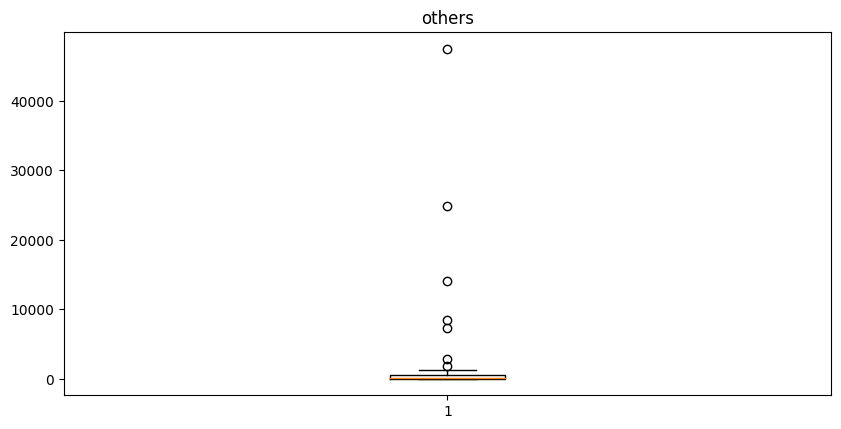

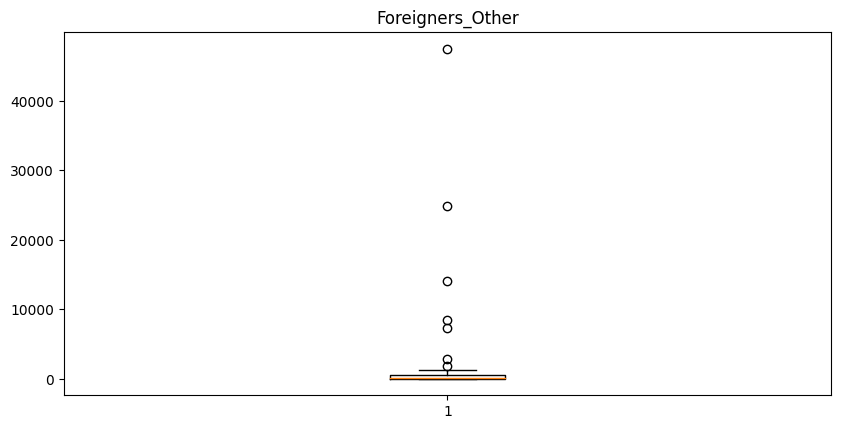

In [70]:
size = df.columns.size
for j, i in enumerate(df.columns):
  plt.figure(figsize=(7*15,5*10))
  plt.subplot(size,size,j+1)
  plt.title(i)
  plt.boxplot(df[i])
plt.show()

In [71]:
df.isnull().sum()

,0
Indians,0
Foreigners,0
Indian_Male,0
Indian_Female,0
Foreigners_Male,0
Foreigners_Female,0
Total Population,0
others,0
Foreigners_Other,0


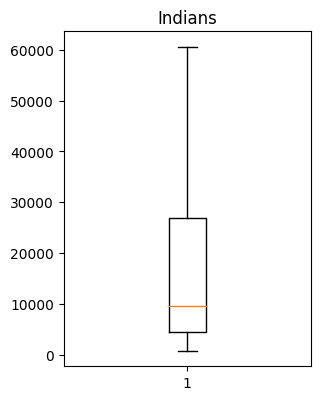

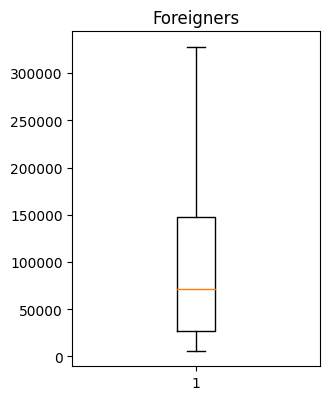

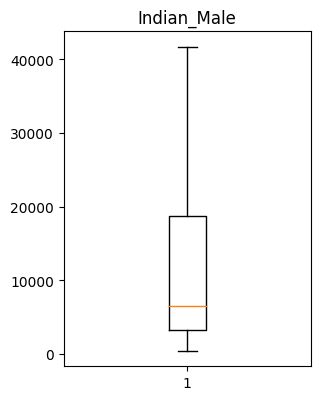

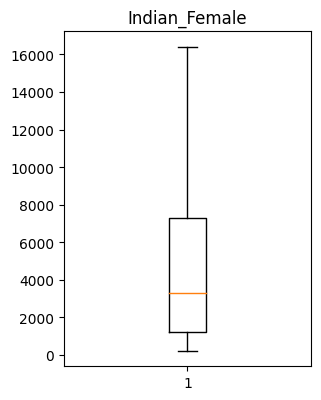

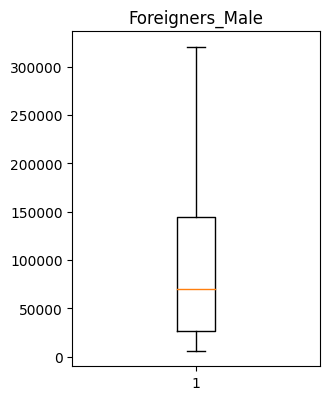

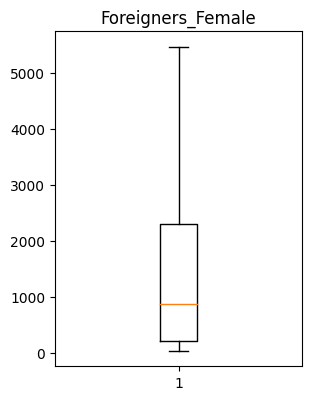

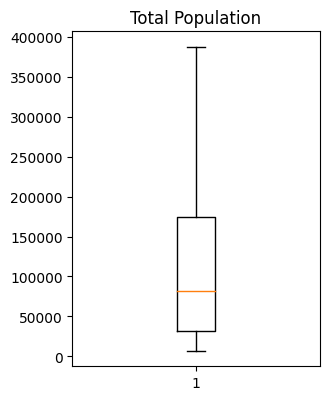

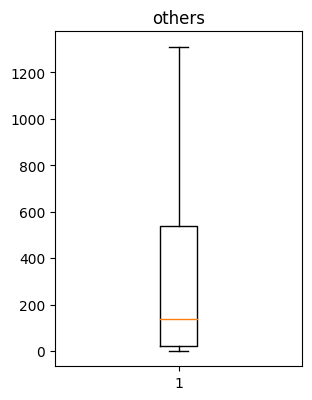

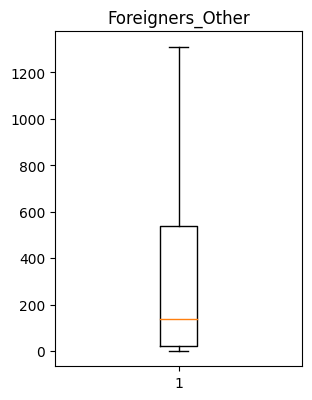

In [76]:
for i in df.columns:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  IQR = q3 - q1
  lower = q1 - 1.5 * IQR
  upper = q3 + 1.5 * IQR
  # df = df[(df[i] >= lower) & (df[i] <= upper)]
  df[i] = np.where(df[i] < lower, lower, df[i])
  df[i] = np.where(df[i] > upper, upper, df[i])

size = df.columns.size
for j, i in enumerate(df.columns):
  plt.figure(figsize=(2*15,2*10))
  plt.subplot(4,8,j+1)
  plt.title(i)
  plt.boxplot(df[i])
plt.show()


In [77]:
df.drop('Total Population', axis=1, inplace=True)

In [79]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()
df = pd.DataFrame(norm.fit_transform(df), columns=df.columns)
df.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,others,Foreigners_Other
0,0.130386,0.705411,0.089736,0.035307,0.689885,0.011756,0.002818,0.002818
1,0.130386,0.705411,0.089736,0.035307,0.689885,0.011756,0.002818,0.002818
2,0.130386,0.705411,0.089736,0.035307,0.689885,0.011756,0.002818,0.002818
3,0.130386,0.705411,0.089736,0.035307,0.689885,0.011756,0.002818,0.002818
4,0.119463,0.707633,0.068625,0.035418,0.692058,0.007951,0.002571,0.002571


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

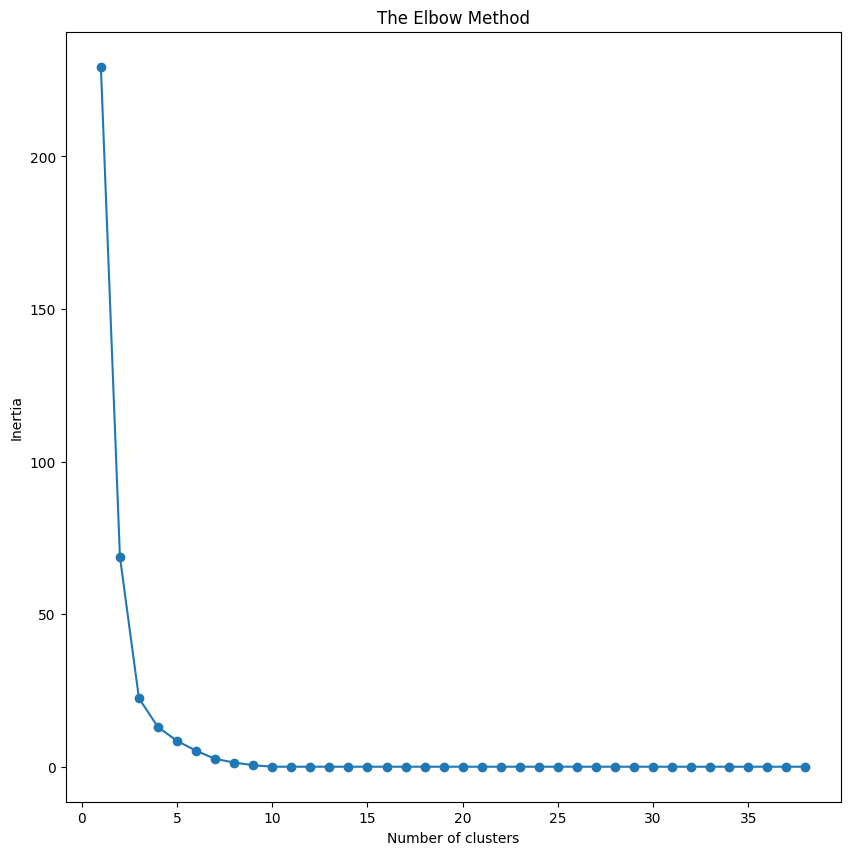

In [92]:
from sklearn.cluster import KMeans
inertia = []
cluster_range = range(1,39)
for cluster in range(1,39):
  kmeans = KMeans(n_clusters=cluster, random_state=41)
  kmeans.fit(df)
  inertia.append(kmeans.inertia_)

plt.figure(figsize=(10,10))
plt.plot(cluster_range, inertia, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()



In [93]:
model = KMeans(n_clusters=10, random_state=41)
model.fit(df)
pred = model.predict(df)
df['cluster'] = pred
df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,others,Foreigners_Other,cluster
0,0.130386,0.705411,0.089736,0.035307,0.689885,0.011756,0.002818,0.002818,0
1,0.130386,0.705411,0.089736,0.035307,0.689885,0.011756,0.002818,0.002818,0
2,0.130386,0.705411,0.089736,0.035307,0.689885,0.011756,0.002818,0.002818,0
3,0.130386,0.705411,0.089736,0.035307,0.689885,0.011756,0.002818,0.002818,0
4,0.119463,0.707633,0.068625,0.035418,0.692058,0.007951,0.002571,0.002571,5


In [94]:
print(model.inertia_)

0.002838781795228196
